Correlation: 0.7019932194311714


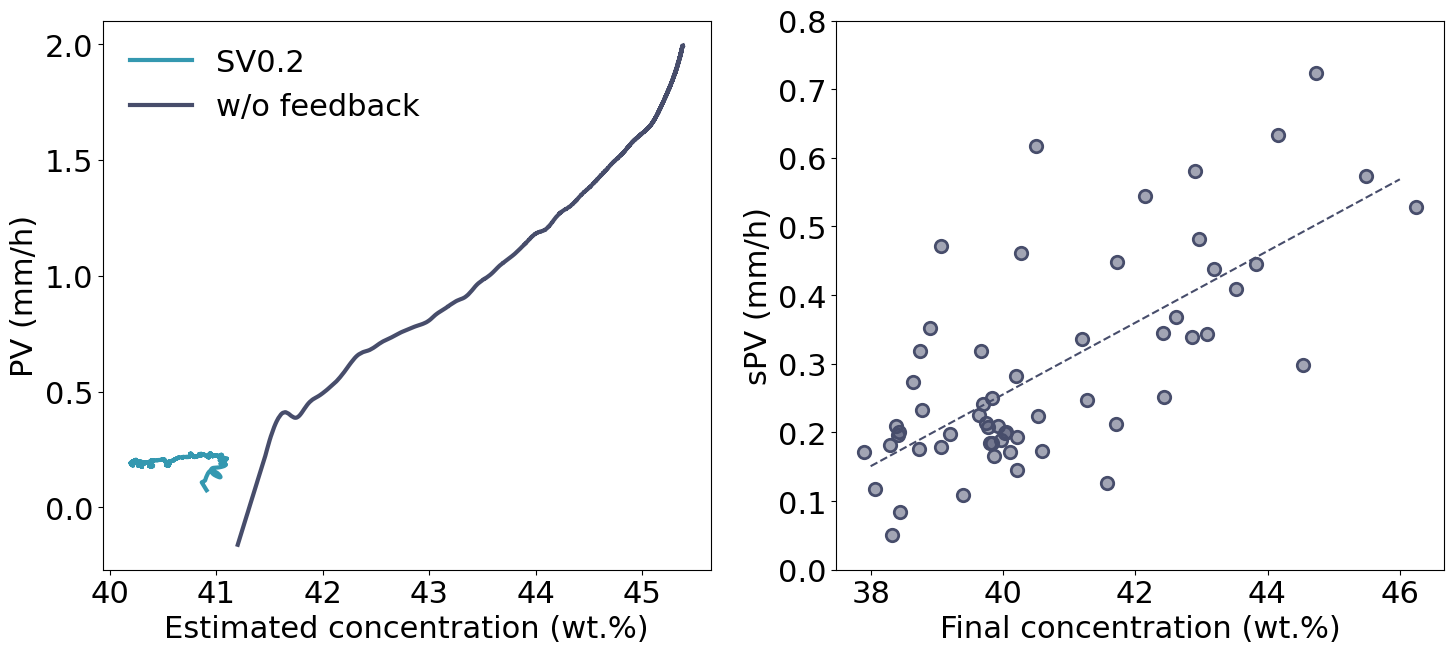

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

# Read data
path1 = "../Data/Figure4/pv-conc.xlsx" # Figure4a
path2 = "../Data/Figure4/231021-SUMMARY.xlsx" # Figure4b

df = pd.read_excel(path1,sheet_name='summary')
df = df[717:] # cut the first 1 hour

x1 = df['02-estC'].to_list()
x2 = df['No-C'].to_list()
y1 = df['02-R'].to_list()
y2 = df['No-R'].to_list()

df2 = pd.read_excel(path2, sheet_name='Sheet2')
x = df2['Last_C'].to_list()
y = df2['PV'].to_list()
a, b = np.polyfit(x,y,1)
x_line = [38,46]
y_line = [a*n+b for n in x_line]

# correlation
correlation, _ = pearsonr(np.array(x), np.array(y))

print("Correlation:", correlation)

### Plot ###
plt.rcParams["font.size"] = 22
fig, axes = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=(15,7))
color = "#474D6B" # blue gray

axes[0].plot(x1,y1,c='#3498B0', label='SV0.2',linewidth=3)
axes[0].plot(x2,y2,c="#474D6B", label='w/o feedback',linewidth=3)
axes[0].set_xlabel('Estimated concentration (wt.%)')
axes[0].set_ylabel('PV (mm/h)')
axes[0].legend(frameon=False)

axes[1].scatter(x,y,c="#474D6B80",ec="#474D6B",s=80,linewidth=2)
axes[1].set_xlabel('Final concentration (wt.%)')
axes[1].set_ylabel('sPV (mm/h)')
axes[1].set_ylim(0,0.8)
axes[1].plot(x_line, y_line, c = "#474D6B", linestyle='dashed')

figsavepath = "../Plots"
plt.savefig(f'{figsavepath}/Figure4.svg', dpi=1200, bbox_inches='tight', transparent=True)